# Importing libraries, model and extracting content 

In [ ]:
# Importing zip file
import zipfile
zip_ref = zipfile.ZipFile("archive.zip",'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# importing model
import tensorflow as tf
from tensorflow import keras
#from keras.applications.vgg16 import VGG16
from keras.api.applications.vgg16 import VGG16
model=VGG16()

In [44]:
# printing model summary
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# importing libraries
from tensorflow.keras.utils import image_dataset_from_directory
import pandas as pd

In [46]:
# importing libraries
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

pd.options.display.max_colwidth = 100

import random
import os

from numpy.random import seed
seed(42)

random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import glob
import cv2

from tensorflow.random import set_seed
set_seed(42)

import warnings
warnings.filterwarnings('ignore')

In [47]:
#importing libraries
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import mixed_precision, layers
import tensorflow as tf


# Training Model

In [48]:
#converting path images to desirable form and classifying it
main_path = "/content/chest_xray"
train_path = os.path.join(main_path,"train")
test_path=os.path.join(main_path,"test")
num_classes = len(os.listdir(train_path))
BATCH_SIZE = 8
IMG_SIZE = (224, 224)

# Image Augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical')
val_generator = val_datagen.flow_from_directory(
    test_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical')



Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


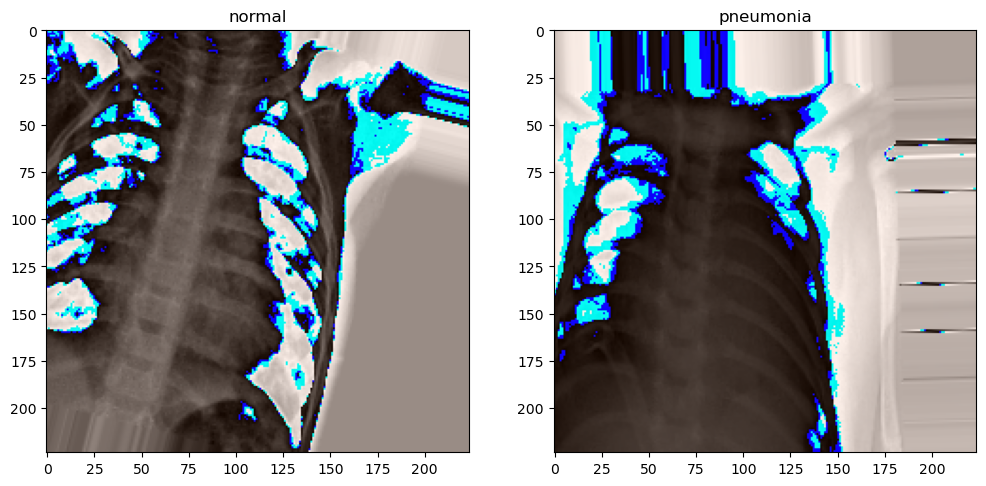

In [167]:

import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images from the train generator
images, labels = next(train_generator)

# Select one image from each class
class_indices = np.unique(labels.argmax(axis=1))
selected_images = [images[np.where(labels == class_index)[1][0]] for class_index in class_indices]
class_labels = ['normal', 'pneumonia']
# Plot the selected images
fig, axes = plt.subplots(1, len(selected_images), figsize=(12, 6))
for i, image in enumerate(selected_images):
    axes[i].imshow(image.astype('uint8'))
    axes[i].set_title(class_labels[i])
plt.show()

In [68]:
# Predicting the model with single layer siftmax function
base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_tensor=Input(shape=(224, 224,3)),  # Set custom input shape
    pooling=None,
    classifier_activation=None,
)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add custom head
headModel = Flatten()(base_model.output)
predictions = Dense(2, activation="softmax")(headModel)  # using softmax activation
model = Model(inputs=base_model.input, outputs=predictions)

# Compiling model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)
plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_generator,
          batch_size = 32, epochs = 10,
          validation_data=val_generator,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=train_generator.samples,
          validation_steps=val_generator.samples);


Epoch 1/10
5216/5216 ━━━━━━━━━━━━━━━━━━━━ 322s 61ms/step - accuracy: 0.9184 - loss: 2.9042 - val_accuracy: 0.8862 - val_loss: 7.9254 - learning_rate: 0.0010
Epoch 2/10
5216/5216 ━━━━━━━━━━━━━━━━━━━━ 323s 62ms/step - accuracy: 0.9546 - loss: 2.8610 - val_accuracy: 0.8542 - val_loss: 12.7176 - learning_rate: 0.0010
Epoch 3/10
5216/5216 ━━━━━━━━━━━━━━━━━━━━ 323s 62ms/step - accuracy: 0.9560 - loss: 3.1372 - val_accuracy: 0.7548 - val_loss: 34.0274 - learning_rate: 0.0010
Epoch 4/10
5216/5216 ━━━━━━━━━━━━━━━━━━━━ 323s 62ms/step - accuracy: 0.9596 - loss: 2.7590 - val_accuracy: 0.8766 - val_loss: 12.3595 - learning_rate: 0.0010
Epoch 5/10
5216/5216 ━━━━━━━━━━━━━━━━━━━━ 322s 61ms/step - accuracy: 0.9742 - loss: 1.8516 - val_accuracy: 0.8574 - val_loss: 15.9215 - learning_rate: 5.0000e-04
Epoch 6/10
5216/5216 ━━━━━━━━━━━━━━━━━━━━ 322s 62ms/step - accuracy: 0.9721 - loss: 1.7012 - val_accuracy: 0.8253 - val_loss: 23.4568 - learning_rate: 5.0000e-04


In [69]:
#model summary of previous model
print(model.summary())

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 2)                   │          50,178 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,865,224 (56.71 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 100,358 (392.03 KB)

None


# Fine Tuning the Model

In [70]:
#unfreeing last 10 layers
for layer in base_model.layers[-10:]:
    if not isinstance(layer, layers.BatchNormalization):
        layer.trainable = True
for (i,layer) in enumerate(base_model.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D True
10 MaxPooling2D True
11 Conv2D True
12 Conv2D True
13 Conv2D True
14 MaxPooling2D True
15 Conv2D True
16 Conv2D True
17 Conv2D True
18 MaxPooling2D True


In [75]:
#compiling the new model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)
plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3)
model.compile(optimizer=Adam(1e-5),  # Very low learning rate for fine-tuning
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Training the new model

In [76]:
#training the new model
history = model.fit(train_generator,
          batch_size = 32, epochs = 10,
          validation_data=val_generator,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=train_generator.samples,
          validation_steps=val_generator.samples);

Epoch 1/10
5216/5216 ━━━━━━━━━━━━━━━━━━━━ 541s 103ms/step - accuracy: 0.9625 - loss: 0.4380 - val_accuracy: 0.7596 - val_loss: 6.1760 - learning_rate: 1.0000e-05
Epoch 2/10
5216/5216 ━━━━━━━━━━━━━━━━━━━━ 549s 105ms/step - accuracy: 0.9625 - loss: 0.2311 - val_accuracy: 0.8157 - val_loss: 1.9783 - learning_rate: 1.0000e-05
Epoch 3/10
5216/5216 ━━━━━━━━━━━━━━━━━━━━ 552s 106ms/step - accuracy: 0.9666 - loss: 0.1373 - val_accuracy: 0.6971 - val_loss: 2.9651 - learning_rate: 1.0000e-05
Epoch 4/10
5216/5216 ━━━━━━━━━━━━━━━━━━━━ 551s 105ms/step - accuracy: 0.9751 - loss: 0.0910 - val_accuracy: 0.8766 - val_loss: 0.9725 - learning_rate: 1.0000e-05
Epoch 5/10
5216/5216 ━━━━━━━━━━━━━━━━━━━━ 551s 105ms/step - accuracy: 0.9783 - loss: 0.0790 - val_accuracy: 0.8654 - val_loss: 0.8270 - learning_rate: 1.0000e-05
Epoch 6/10
5216/5216 ━━━━━━━━━━━━━━━━━━━━ 551s 105ms/step - accuracy: 0.9794 - loss: 0.0718 - val_accuracy: 0.8221 - val_loss: 1.2730 - learning_rate: 1.0000e-05
Epoch 7/10
5216/5216 ━━━━━━━

# Plotting Graph

NameError: name 'training' is not defined

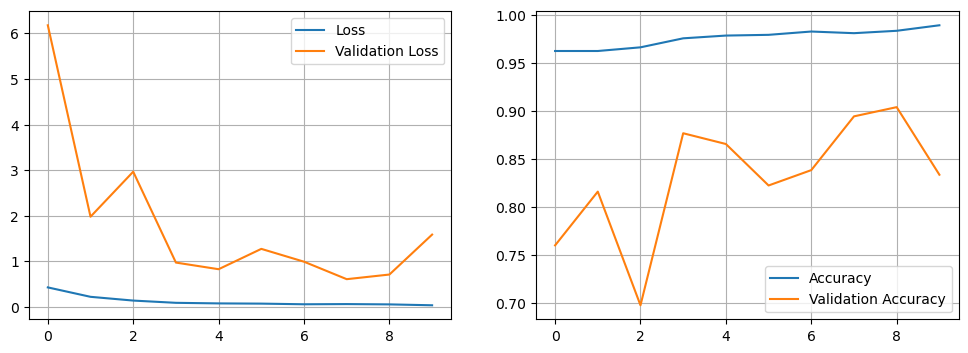

In [79]:
#plotting graphs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'] , label='Validation Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.grid(True)

# Checking the model with random samples

In [171]:
# Checking with random Samples
main = "sample_data"

num_classes = len(os.listdir(main))
BATCH_SIZE = 8
IMG_SIZE = (224, 224)

val = val_datagen.flow_from_directory(
    main,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,)

Found 8 images belonging to 1 classes.


In [172]:
#predicting on five random samples
x=np.array(model.predict(val))
x

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


array([[1.0000000e+00, 6.9698699e-16],
       [3.6570604e-11, 1.0000000e+00],
       [3.2235728e-15, 1.0000000e+00],
       [3.3133711e-05, 9.9996686e-01],
       [1.3225638e-14, 1.0000000e+00],
       [1.0000000e+00, 1.1566313e-15],
       [7.0583136e-12, 1.0000000e+00],
       [1.0000000e+00, 7.1757698e-09]], dtype=float32)

In [173]:
# converting into readable results
results = []
for row in x:
    if row[0] > 0.5:
          results.append('normal')
    elif row[1] > 0.5:
          results.append('pneumonia')
results


['normal',
 'pneumonia',
 'pneumonia',
 'pneumonia',
 'pneumonia',
 'normal',
 'pneumonia',
 'normal']